# Facial keypoints detection

## Introduction

Notre données est constitué par 15 paires de valeurs réelles (x,y) dans l'espace des indices de pixels. Chaque paire représent un élément clé du visage. 

Nos 15 éléments clés du visage: 
* left_eye_center, 
* right_eye_center, 
* left_eye_inner_corner, 
* left_eye_outer_corner, 
* right_eye_inner_corner, 
* right_eye_outer_corner, 
* left_eyebrow_inner_end, 
* left_eyebrow_outer_end, 
* right_eyebrow_inner_end, 
* right_eyebrow_outer_end, 
* nose_tip, 
* mouth_left_corner,
* mouth_right_corner,
* mouth_center_top_lip,
* mouth_center_bottom_lip.



## Objetctif

L'objectif est de prédire __les positions des points clés sur les images de visage__.

## Les imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Chargement de données

In [2]:
df = pd.read_csv('/Users/sariakarandrianjanahary/Desktop/projet_kaggle_sariaka/projet2/data/training.csv')

In [43]:
df.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [4]:
df.shape

(7049, 31)

## Exploitation des données 

La colonne **Image** contient les données de visage dont les 30 premières colonnes représentent les données de points clés (15 coordonnées x et 15 coordonnées y). 

In [5]:
def convert_image(string):
    """convertir la variable image en numpy array."""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

def plot_image(nrows=5, ncols=5):
    """ affiche au hasard 25 visage dans les données"""
    #selection des images dans df
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(convert_image(string), cmap='gray')
        ax.axis('off')

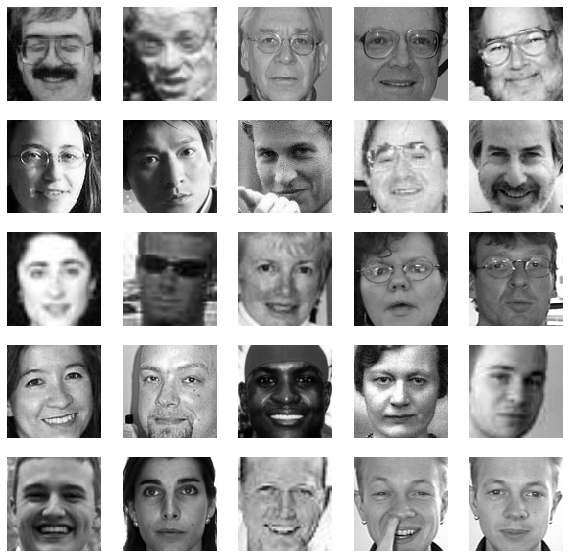

In [6]:
plot_image()

In [7]:
#points 
points = list(df.columns)[:-1]

In [8]:
xy = df.iloc[0][points].values.reshape((15, 2))
xy 

array([[66.0335639098, 39.0022736842],
       [30.2270075188, 36.4216781955],
       [59.582075188000005, 39.647422556399995],
       [73.1303458647, 39.9699969925],
       [36.3565714286, 37.3894015038],
       [23.4528721805, 37.3894015038],
       [56.9532631579, 29.0336481203],
       [80.2271278195, 32.2281383459],
       [40.2276090226, 29.0023218045],
       [16.3563789474, 29.6474706767],
       [44.4205714286, 57.0668030075],
       [61.1953082707, 79.9701654135],
       [28.6144962406, 77.38899248119999],
       [43.3126015038, 72.9354586466],
       [43.1307067669, 84.4857744361]], dtype=object)

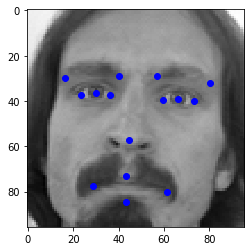

In [9]:
plt.plot(xy[:, 0], xy[:, 1], 'bo')
plt.imshow(convert_image(df.iloc[0]['Image']), cmap='gray')

In [47]:
def plot_image_with_points(nrows=5, ncols=5):
    """Affiche au hasard certains visages des données de formation avec leurs points clés."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    keypoint_cols = list(df.columns)[:-1]
    keypoints = df.loc[selection][keypoint_cols]
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, (iloc, keypoint), ax in zip(image_strings, keypoints.iterrows(), axes.ravel()):
        xy = keypoint.values.reshape((15, 2))
        ax.imshow(convert_image(string), cmap='gray')
        ax.plot(xy[:, 0], xy[:, 1], 'bo')
        ax.axis('off')

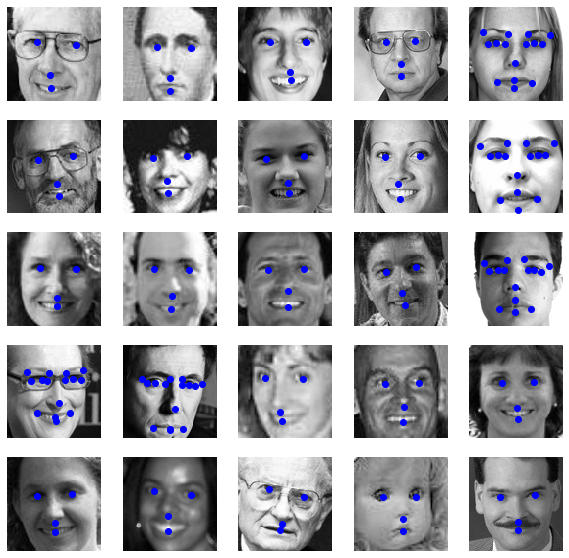

In [48]:
plot_image_with_points()

Nous pouvons faire plusieurs observations à partir de cette image :

* certaines images sont à haute résolution c'est à dire qu'elles comportent les 15 points clés
* certaines images sont à basse résolution c'est à dire qu'elles ne comportent qe 4 points clés 

In [12]:
# compte nombre d'image pour chaque point clé du visage 
descible_data=df.describe().loc['count']

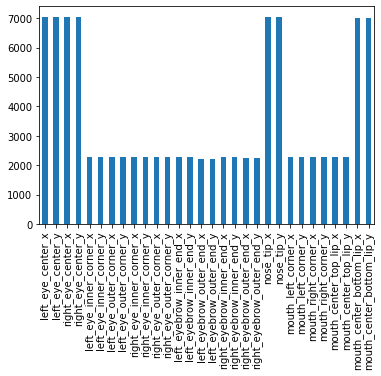

In [13]:
descible_data.plot.bar()

On peut voir que dans l'enseble de données : 
* seules 2000 images sont avec tous les points clés 
* 5000 autres images sont avec seulement 4 points clés étiquetés.


In [14]:
#supression de toutes les lignes qui contiennent des valeurs manquantes
data= df.dropna()

In [15]:
data.shape

(2140, 31)

In [16]:
X = np.stack([convert_image(string) for string in data['Image']])

In [17]:
X=X.astype(np.float)[:, :, :, np.newaxis]

In [20]:
y = np.vstack(data[data.columns[:-1]].values)

In [21]:
X.shape, X.dtype

((2140, 96, 96, 1), dtype('float64'))

In [22]:
y.shape, y.dtype

((2140, 30), dtype('float64'))

In [23]:
X_train = X / 255.

## Modele simple

Pour le premier modèle, j’ai mis en place un réseau de neurones simple constitué d’une couche d’entrée d’images de taille 96x96 (9216 neurones), d’une seule couche cachée entièrement connecté avec 100 neurones puis une couche de sorties ayant 30 sorties (coordonnées x et y de les 15 points clés). J’ai appliqué la structure pendant 200 époques (epochs)  sur les données et a calculé la perte et la précision sur l'ensemble de données.

In [24]:
#L'idée derrière le pipelining est qu'il permet de 
#suivre facilement les transformations appliquées à nos données
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1)))

y_train = output_pipe.fit_transform(y)

In [25]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D

Using TensorFlow backend.


In [26]:
model = Sequential()
# couche d'entrée et une couche cachée 100
model.add(Dense(100, activation="relu", input_shape=(96*96,)))
model.add(Activation('relu'))
# couche de sortie
model.add(Dense(30))

In [27]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 200 # epoque
history = model.fit(X_train.reshape(y_train.shape[0], -1), y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Train on 1712 samples, validate on 428 samples
Epoch 1/200
1712/1712 [==============================] - 1s 671us/step - loss: 0.0699 - accuracy: 0.1075 - val_loss: 0.0749 - val_accuracy: 0.0280
Epoch 2/200
1712/1712 [==============================] - 1s 483us/step - loss: 0.0355 - accuracy: 0.2786 - val_loss: 0.0694 - val_accuracy: 0.0607
Epoch 3/200
1712/1712 [==============================] - 1s 495us/step - loss: 0.0332 - accuracy: 0.3394 - val_loss: 0.0673 - val_accuracy: 0.0561
Epoch 4/200
1712/1712 [==============================] - 1s 488us/step - loss: 0.0321 - accuracy: 0.3575 - val_loss: 0.0688 - val_accuracy: 0.0654
Epoch 5/200
1712/1712 [==============================] - 1s 489us/step - loss: 0.0311 - accuracy: 0.3616 - val_loss: 0.0659 - val_accuracy: 0.0491
Epoch 6/200
1712/1712 [==============================] - 1s 491us/step - loss: 0.0301 - accuracy: 0.3791 - val_loss: 0.0665 - val_accuracy: 0.0771
Epoch 7/200
1712/1712 [==============================] - 1s 561us/step 

1712/1712 [==============================] - 1s 484us/step - loss: 0.0119 - accuracy: 0.5327 - val_loss: 0.0500 - val_accuracy: 0.1098
Epoch 57/200
1712/1712 [==============================] - 1s 481us/step - loss: 0.0119 - accuracy: 0.5304 - val_loss: 0.0471 - val_accuracy: 0.1379
Epoch 58/200
1712/1712 [==============================] - 1s 479us/step - loss: 0.0118 - accuracy: 0.5333 - val_loss: 0.0472 - val_accuracy: 0.1121
Epoch 59/200
1712/1712 [==============================] - 1s 479us/step - loss: 0.0119 - accuracy: 0.5315 - val_loss: 0.0494 - val_accuracy: 0.1495
Epoch 60/200
1712/1712 [==============================] - 1s 501us/step - loss: 0.0119 - accuracy: 0.5438 - val_loss: 0.0478 - val_accuracy: 0.1402
Epoch 61/200
1712/1712 [==============================] - 1s 519us/step - loss: 0.0116 - accuracy: 0.5345 - val_loss: 0.0478 - val_accuracy: 0.1332
Epoch 62/200
1712/1712 [==============================] - 1s 523us/step - loss: 0.0118 - accuracy: 0.5356 - val_loss: 0.0525 

1712/1712 [==============================] - 1s 571us/step - loss: 0.0090 - accuracy: 0.5590 - val_loss: 0.0460 - val_accuracy: 0.1659
Epoch 112/200
1712/1712 [==============================] - 1s 531us/step - loss: 0.0089 - accuracy: 0.5602 - val_loss: 0.0511 - val_accuracy: 0.1425
Epoch 113/200
1712/1712 [==============================] - 1s 486us/step - loss: 0.0089 - accuracy: 0.5567 - val_loss: 0.0501 - val_accuracy: 0.1659
Epoch 114/200
1712/1712 [==============================] - 1s 517us/step - loss: 0.0091 - accuracy: 0.5572 - val_loss: 0.0468 - val_accuracy: 0.1636
Epoch 115/200
1712/1712 [==============================] - 1s 521us/step - loss: 0.0088 - accuracy: 0.5596 - val_loss: 0.0466 - val_accuracy: 0.1402
Epoch 116/200
1712/1712 [==============================] - 1s 603us/step - loss: 0.0087 - accuracy: 0.5613 - val_loss: 0.0478 - val_accuracy: 0.1612
Epoch 117/200
1712/1712 [==============================] - 1s 632us/step - loss: 0.0087 - accuracy: 0.5607 - val_loss: 0

1712/1712 [==============================] - 1s 529us/step - loss: 0.0078 - accuracy: 0.5607 - val_loss: 0.0475 - val_accuracy: 0.1542
Epoch 167/200
1712/1712 [==============================] - 1s 470us/step - loss: 0.0076 - accuracy: 0.5491 - val_loss: 0.0479 - val_accuracy: 0.1846
Epoch 168/200
1712/1712 [==============================] - 1s 553us/step - loss: 0.0076 - accuracy: 0.5526 - val_loss: 0.0485 - val_accuracy: 0.1565
Epoch 169/200
1712/1712 [==============================] - 1s 471us/step - loss: 0.0075 - accuracy: 0.5543 - val_loss: 0.0482 - val_accuracy: 0.1589
Epoch 170/200
1712/1712 [==============================] - 1s 571us/step - loss: 0.0077 - accuracy: 0.5561 - val_loss: 0.0471 - val_accuracy: 0.1799
Epoch 171/200
1712/1712 [==============================] - 1s 510us/step - loss: 0.0077 - accuracy: 0.5637 - val_loss: 0.0463 - val_accuracy: 0.1752
Epoch 172/200
1712/1712 [==============================] - 1s 471us/step - loss: 0.0075 - accuracy: 0.5619 - val_loss: 0

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________


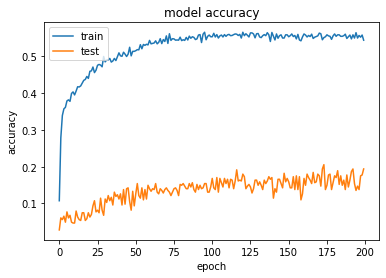

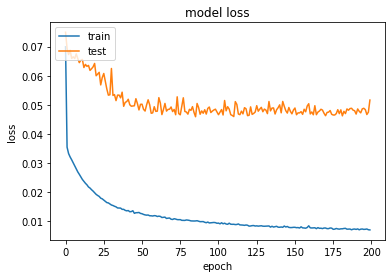

In [29]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ce que nous voyons ici, c'est qu'avec ce modèle, l'apprentissage atteint rapidement un plateau.



Une chose qui ressort clairement du graphique ci-dessus est que notre modèle est surdimensionné : les pertes en train et en test ne sont pas comparables (la perte en test est 3 fois plus élevée).

In [30]:
img = X_train[0, :, :, :].reshape(1, -1)
predictions = model.predict(img)

In [31]:
img

array([[0.93333333, 0.9254902 , 0.92941176, ..., 0.2745098 , 0.29411765,
        0.35294118]])

In [32]:
xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)

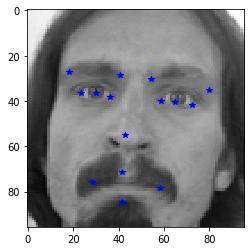

In [33]:
plt.imshow(X_train[0, :, :, 0], cmap='gray')
plt.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'b*')

In [34]:
def plot_faces_with_keypoints_and_predictions(model, nrows=5, ncols=5, model_input='flat'):
    """Plots sampled faces with their truth and predictions."""
    selection = np.random.choice(np.arange(X.shape[0]), size=(nrows*ncols), replace=False)
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for ind, ax in zip(selection, axes.ravel()):
        img = X_train[ind, :, :, 0]
        if model_input == 'flat':
            predictions = model.predict(img.reshape(1, -1))
        else:
            predictions = model.predict(img[np.newaxis, :, :, np.newaxis])
        xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
        ax.imshow(img, cmap='gray')
        ax.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'bo')
        ax.axis('off')

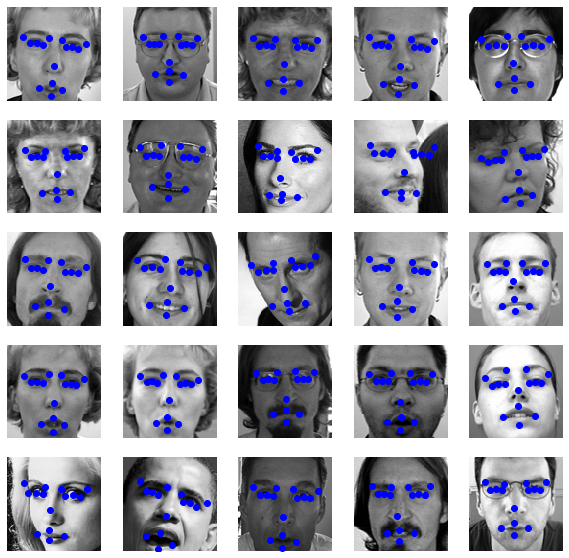

In [36]:
plot_faces_with_keypoints_and_predictions(model)

## Modèle 2

En deuxième modèle, j’ai utilisé le « Convolutional Neural Network » CNN. Ce modèle utilise le  pooling pour réduire le nombre de paramètres et la quantité de calculs dans notre réseau de neurones. Le type de looping qu’on va utilisé est le max-pooling. Il divise chaque filtre de la couche convolutionnelle précédente en des rectangles non chevauchants et fournit la valeur maximale pour chaque rectangle.

In [37]:
from keras.layers import Dropout, Flatten

In [38]:
model = Sequential()
# couche d'entrée
model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Conv2D(24, (5, 5), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# couche 2
model.add(Conv2D(36, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# couche 3
model.add(Conv2D(48, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# couche 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# couche 5
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
# couche 6
model.add(Dense(500, activation="relu"))
# couche 7
model.add(Dense(90, activation="relu"))
# couche 8
model.add(Dense(30))


In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 24)        624       
_________________________________________________________________
activation_2 (Activation)    (None, 92, 92, 24)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 24)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 36)        21636     
_________________________________________________________________
activation_3 (Activation)    (None, 42, 42, 36)       

In [44]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 100
history = model.fit(X_train, y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 24s 14ms/step - loss: 0.0057 - accuracy: 0.6484 - val_loss: 0.0223 - val_accuracy: 0.3248
Epoch 2/100
1712/1712 [==============================] - 22s 13ms/step - loss: 0.0057 - accuracy: 0.6542 - val_loss: 0.0226 - val_accuracy: 0.2827
Epoch 3/100
1712/1712 [==============================] - 23s 13ms/step - loss: 0.0057 - accuracy: 0.6495 - val_loss: 0.0228 - val_accuracy: 0.3084
Epoch 4/100
1712/1712 [==============================] - 24s 14ms/step - loss: 0.0057 - accuracy: 0.6560 - val_loss: 0.0226 - val_accuracy: 0.3154
Epoch 5/100
1712/1712 [==============================] - 26s 15ms/step - loss: 0.0057 - accuracy: 0.6589 - val_loss: 0.0225 - val_accuracy: 0.2897
Epoch 6/100
1712/1712 [==============================] - 24s 14ms/step - loss: 0.0056 - accuracy: 0.6618 - val_loss: 0.0224 - val_accuracy: 0.2850
Epoch 7/100
1712/1712 [==============================] - 27s 16ms/step 

1712/1712 [==============================] - 26s 15ms/step - loss: 0.0043 - accuracy: 0.6887 - val_loss: 0.0211 - val_accuracy: 0.3388
Epoch 57/100
1712/1712 [==============================] - 28s 16ms/step - loss: 0.0043 - accuracy: 0.6817 - val_loss: 0.0211 - val_accuracy: 0.3294
Epoch 58/100
1712/1712 [==============================] - 26s 15ms/step - loss: 0.0044 - accuracy: 0.6910 - val_loss: 0.0208 - val_accuracy: 0.3154
Epoch 59/100
1712/1712 [==============================] - 23s 13ms/step - loss: 0.0043 - accuracy: 0.6974 - val_loss: 0.0212 - val_accuracy: 0.3388
Epoch 60/100
1712/1712 [==============================] - 26s 15ms/step - loss: 0.0043 - accuracy: 0.7033 - val_loss: 0.0209 - val_accuracy: 0.3598
Epoch 61/100
1712/1712 [==============================] - 23s 14ms/step - loss: 0.0043 - accuracy: 0.6764 - val_loss: 0.0210 - val_accuracy: 0.3505
Epoch 62/100
1712/1712 [==============================] - 23s 14ms/step - loss: 0.0043 - accuracy: 0.6764 - val_loss: 0.0214 

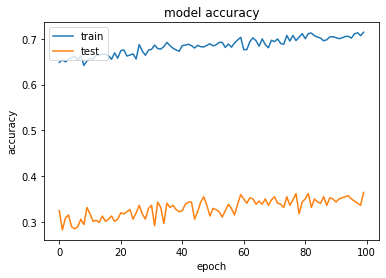

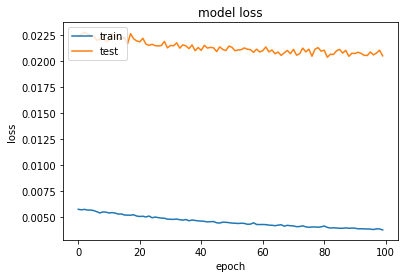

In [45]:
#accuary
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

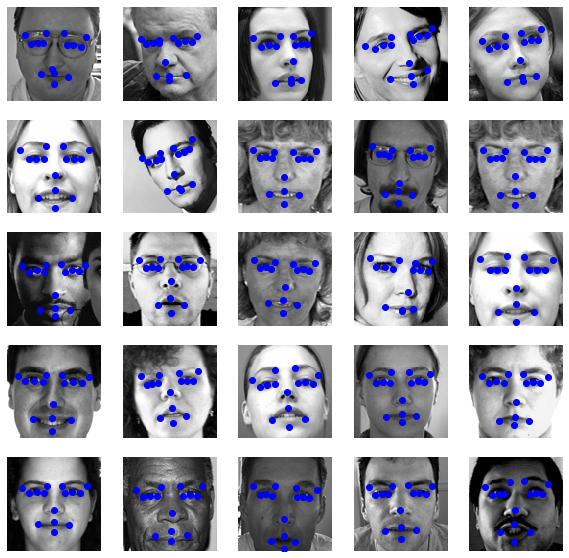

In [46]:
plot_faces_with_keypoints_and_predictions(model, model_input='2d')